# **Proyecto ML de principio a fin**

*Nuestra tarea consiste en predecir el valor medio de las viviendas en los distritos californianos, dada una serie de características de estos distritos.*



# Inicio

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [2]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
%matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);



# Obteniendo los datos

## Descargando los datos

In [3]:
import os;
import tarfile;
import urllib.request;

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/";
HOUSING_PATH = os.path.join("datasets", "housing");
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz";

# esta función descarga los datos desde una url a un directorio
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path);
    tgz_path = os.path.join(housing_path, "housing.tgz");
    urllib.request.urlretrieve(housing_url, tgz_path);
    housing_tgz = tarfile.open(tgz_path);
    housing_tgz.extractall(path=housing_path);
    housing_tgz.close();

In [4]:
# y aquí descargamos los datos
fetch_housing_data();


In [5]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path,"housing.csv");
    print("leyendo:", csv_path);
    return pd.read_csv(csv_path);


## Primer acercamiento a la estructura de los datos

In [6]:
housing = load_housing_data(HOUSING_PATH);
housing.head()

leyendo: datasets/housing/housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


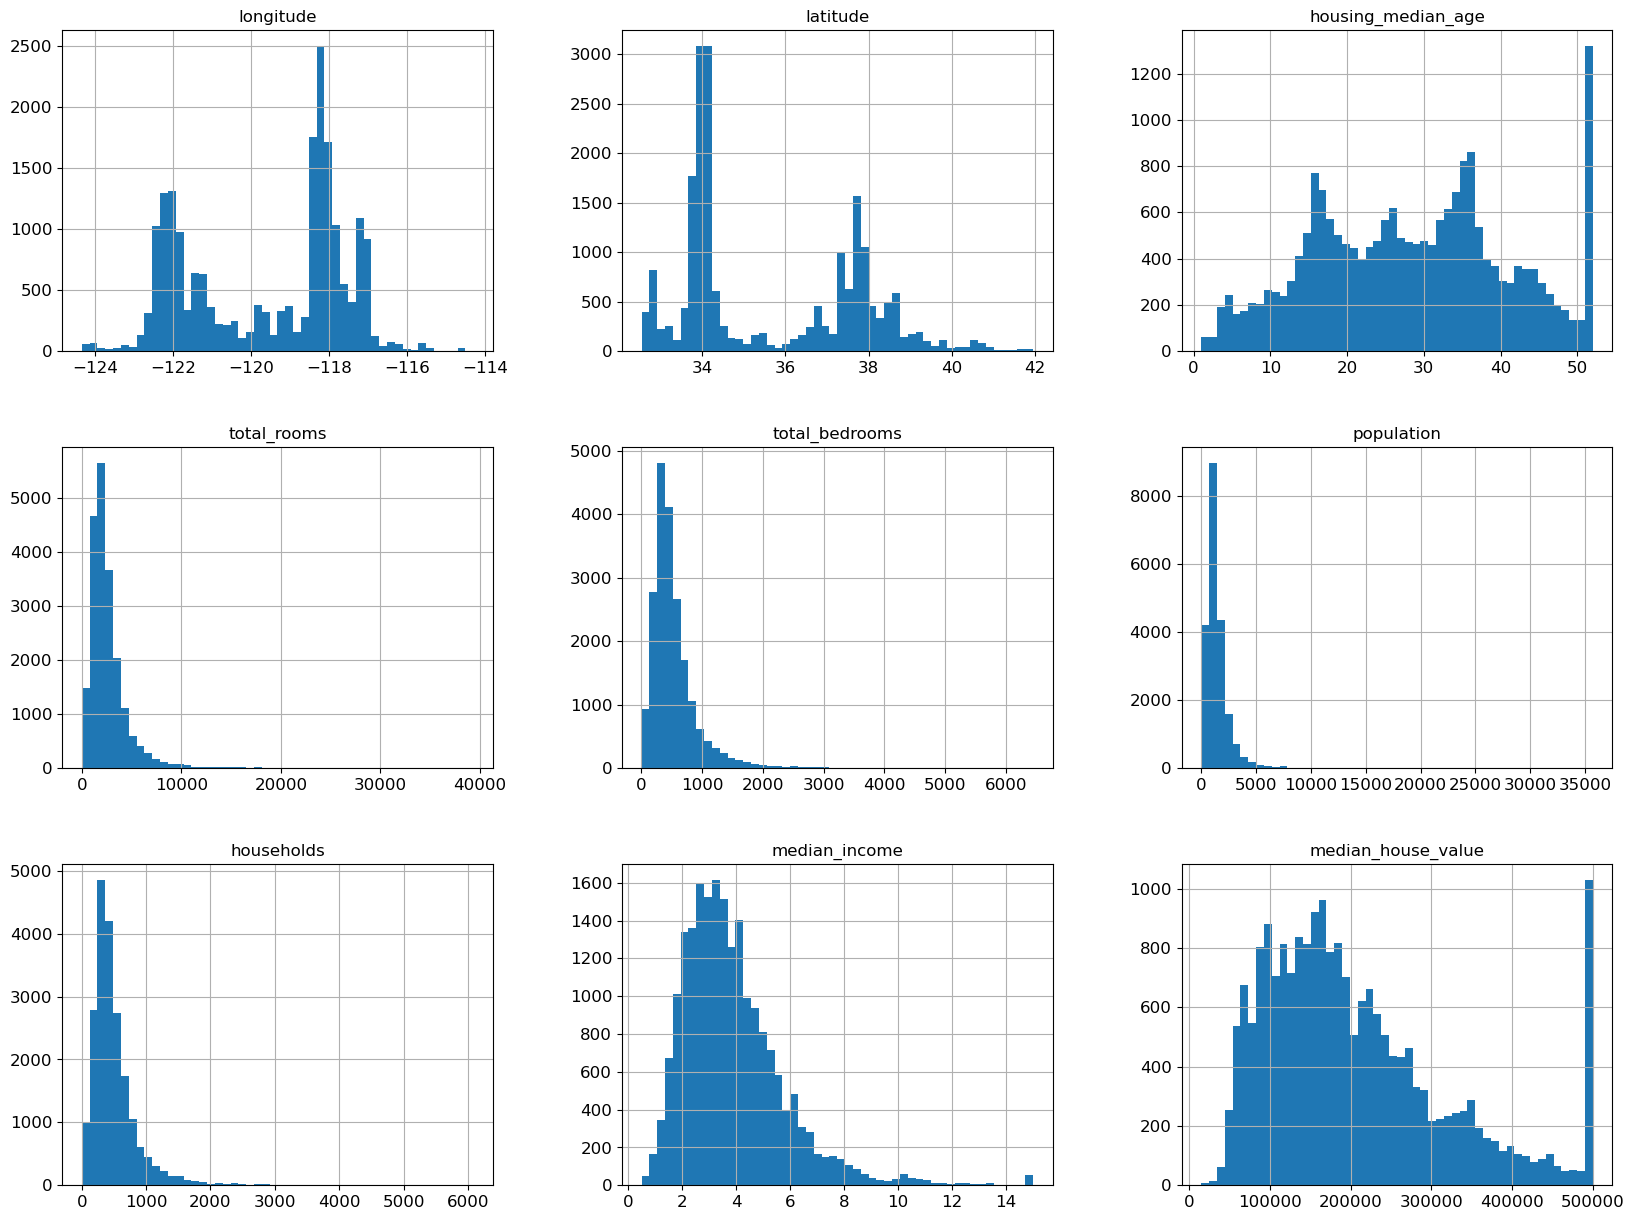

In [10]:
housing.hist(bins=50, figsize=(20,15));


# Descubrir y visualizar los datos para obtener información

---



## Visualizando datos geográficos


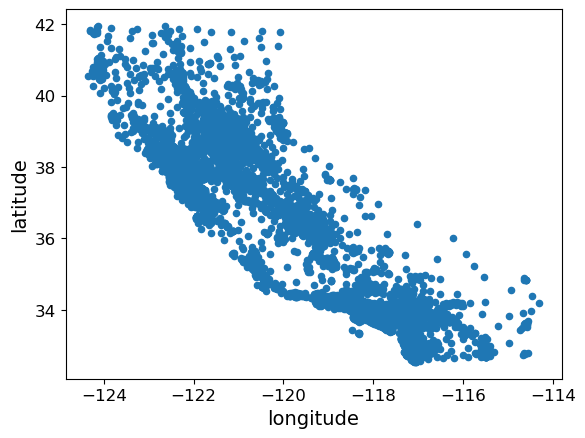

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude");

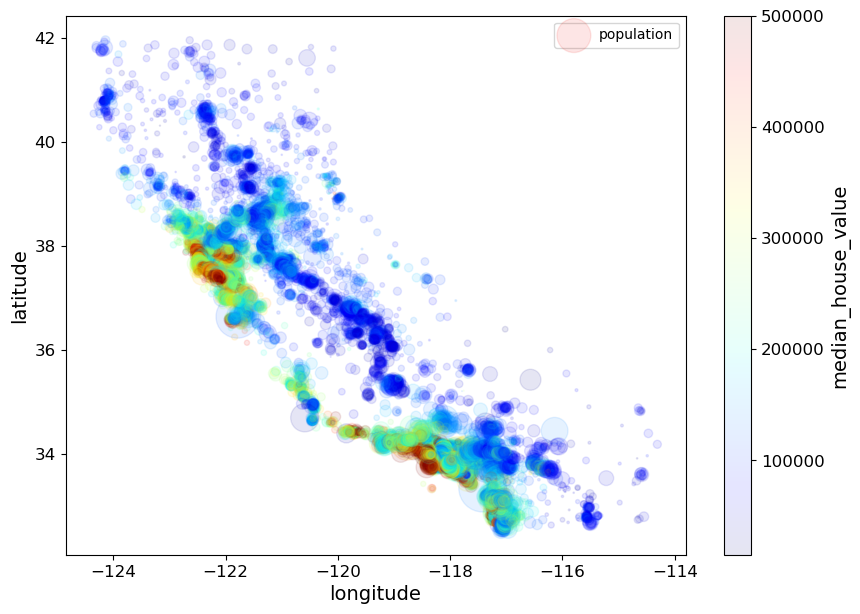

In [34]:
housing.plot(
            kind="scatter", x="longitude", y="latitude", alpha=0.1,
            s=housing["population"]/30, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False
            );


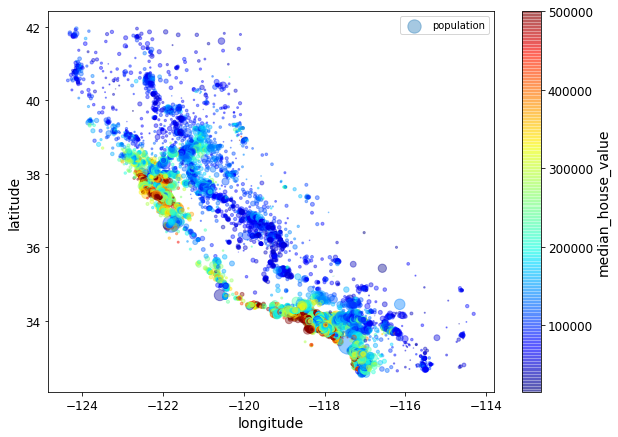

In [38]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f4af7fa3070>)

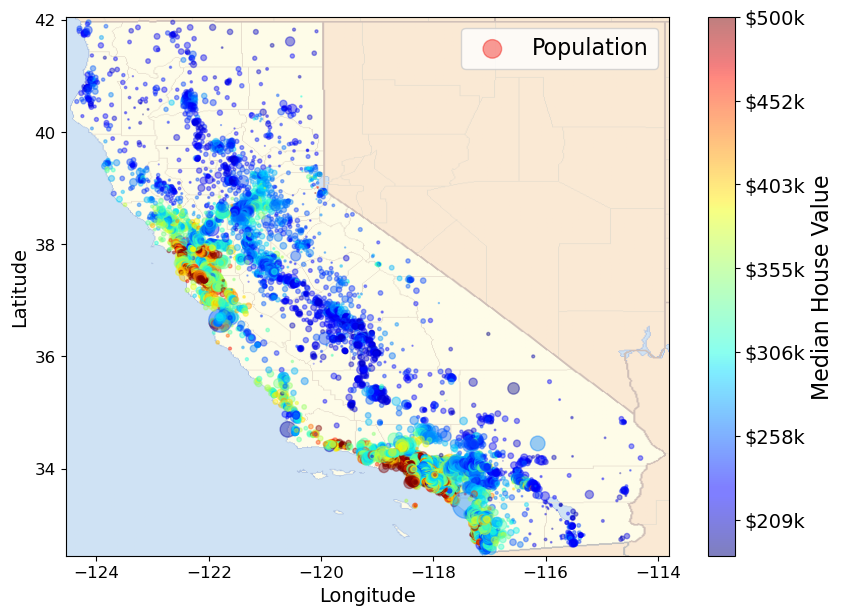

In [39]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Buscando correlaciones

In [40]:
corr_matrix = housing.corr();
corr_matrix

/tmp/ipykernel_865530/3489595089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr();


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [42]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

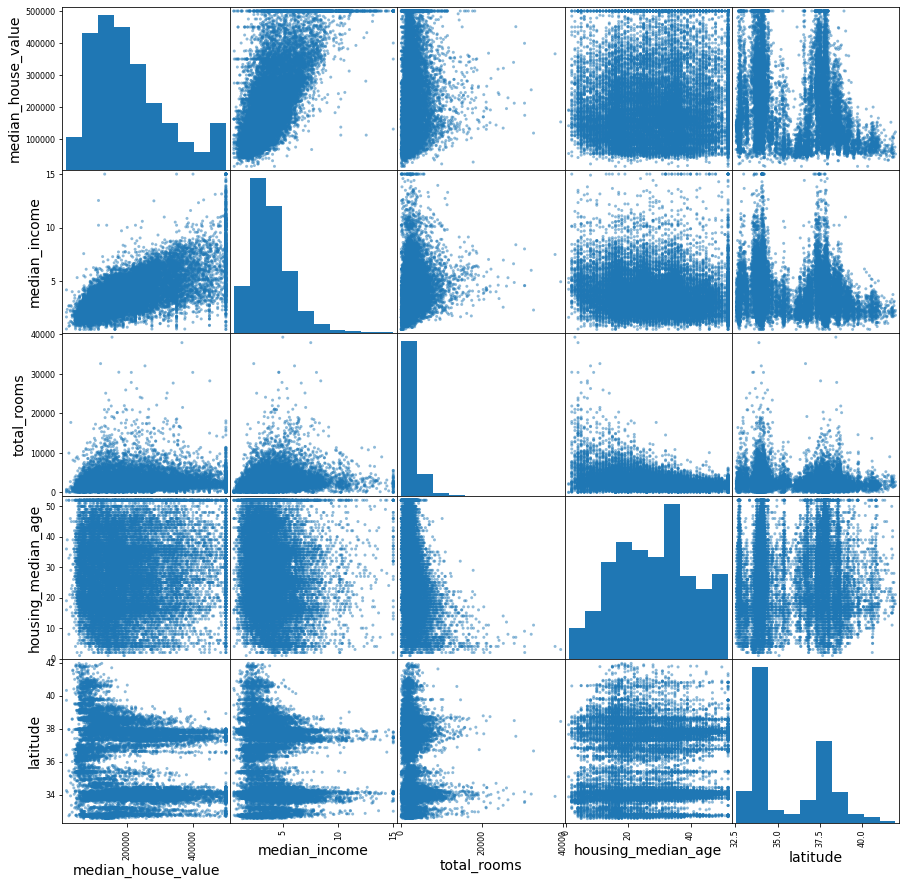

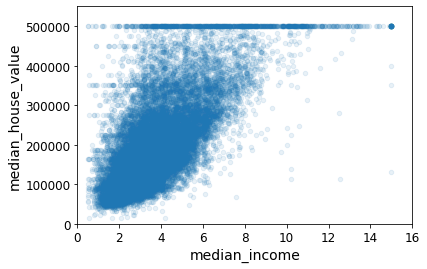

## Experimentando con combinaciones de atributos

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

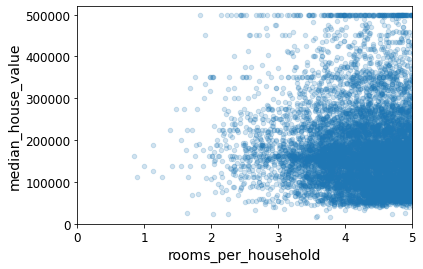

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


La columna de ingresos medios (**median_income**) que es la que tiene más correlación con la columna a predecir, está muy desbalanceada.

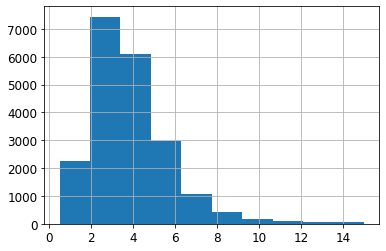

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  income_cat                20640 non-null  int64  
dtypes: flo

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

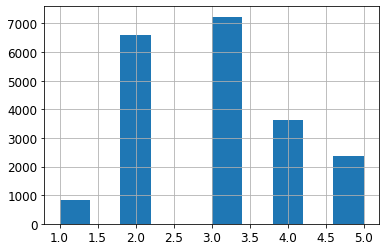

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Preparando los datos para LOS algoritmos de aprendizaje automático

## Limpiando los datos

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


Remove the text attribute because median can only be calculated on numerical attributes:

SimpleImputer(strategy='median')

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

Check that this is the same as manually computing the median of each attribute:

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

Transform the training set:

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,4.633540,0.203162,2.403727


'median'

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.212940,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057700,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175708,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,INLAND


## Gestionando los atributos categóricos o de tipo texto

Now let's preprocess the categorical input feature, `ocean_proximity`:

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,INLAND,0.0,1.0,0.0,0.0,0.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


# Seleccionando y entrenando los modelos

## Creamos el Train y Test Set

In [55]:
# plantamos una semilla



(16512, 4128)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,4.192201,0.203162,3.877437,0.0,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,5.039384,0.203162,2.679795,0.0,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,3.977155,0.203162,1.360332,0.0,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,6.163636,0.203162,3.444444,1.0,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,5.492991,0.203162,2.483645,0.0,0.0,0.0,0.0,1.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,4.192201,0.203162,3.877437,0.0,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,5.039384,0.203162,2.679795,0.0,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,3.977155,0.203162,1.360332,0.0,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,6.163636,0.203162,3.444444,1.0,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,5.492991,0.203162,2.483645,0.0,0.0,0.0,0.0,1.0


## Entrenando y evaluando

LinearRegression()

Generamos las prediciones y las comparamos con los valores reales (sólo 10):

Labels:      [103000.0, 382100.0, 172600.0, 93400.0, 96500.0, 264800.0, 157300.0, 500001.0, 139800.0, 315600.0]
Predictions: [181746.54359617224, 290558.74973506527, 244957.50017769355, 146498.51061398443, 163230.42393939663, 316822.4342662734, 152078.4176737666, 407785.0135403299, 97892.82405623002, 264501.4778312361]


Error cuadrático medio:
$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

67593.20745775255

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

48785.1600248854

DecisionTreeRegressor(random_state=42)

0.0

## Mejorando la evaluación por medio de la validación cruzada

Scores: [65409.88657241 71476.18771125 67905.88325959 72100.36522416
 73523.44190495 66499.03030074 66834.4849106  67510.54861007
 65213.30990412 70947.59409318]
Mean: 68742.07324910603
Standard deviation: 2844.6608877754907


Scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555995 68957.34111906]
Mean: 67828.38677377404
Standard deviation: 2468.0913950651857


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

RandomForestRegressor(random_state=42)

18528.611295019662

Scores: [47269.22020157 51492.08261417 49441.998978   51666.02000409
 52757.92956341 46878.78904481 47471.58557356 50646.72824482
 49117.80276475 50071.44204217]
Mean: 49681.35990313503
Standard deviation: 1915.6666641559589


count       10.000000
mean     67828.386774
std       2601.596761
min      65000.673826
25%      65472.168399
50%      67762.593108
75%      68849.373294
max      72739.875560
dtype: float64

92744.93979513664

# Afinando el modelo

## Grid Search

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

{'max_features': 6, 'n_estimators': 30}

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

63728.2208722647 {'max_features': 2, 'n_estimators': 3}
54813.35330602952 {'max_features': 2, 'n_estimators': 10}
52752.95069867988 {'max_features': 2, 'n_estimators': 30}
60282.020030620006 {'max_features': 4, 'n_estimators': 3}
52069.58816826777 {'max_features': 4, 'n_estimators': 10}
49996.66634820523 {'max_features': 4, 'n_estimators': 30}
57664.81055654801 {'max_features': 6, 'n_estimators': 3}
51050.205113040036 {'max_features': 6, 'n_estimators': 10}
49429.06207254693 {'max_features': 6, 'n_estimators': 30}
58939.730723940556 {'max_features': 8, 'n_estimators': 3}
51937.858466760634 {'max_features': 8, 'n_estimators': 10}
49963.022989912846 {'max_features': 8, 'n_estimators': 30}
62071.820065186905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53968.60720856824 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58006.2293367236 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51477.19314637942 {'bootstrap': False, 'max_features': 3, 'n_estimators'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076192,0.003622,0.006693,0.000142,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.908982e+09,-3.899592e+09,...,-4.061286e+09,1.777379e+08,18,-1.057447e+09,-1.090653e+09,-1.128368e+09,-1.098219e+09,-1.106787e+09,-1.096295e+09,2.316678e+07
1,0.245306,0.011282,0.015764,0.000255,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.960710e+09,-2.935455e+09,...,-3.004504e+09,6.805345e+07,11,-5.471995e+08,-5.683057e+08,-5.951718e+08,-5.804626e+08,-5.783017e+08,-5.738883e+08,1.586912e+07
2,0.710110,0.001782,0.041154,0.000329,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.779962e+09,-2.737927e+09,...,-2.782874e+09,5.167314e+07,9,-4.210153e+08,-4.397356e+08,-4.471757e+08,-4.368283e+08,-4.343039e+08,-4.358118e+08,8.564802e+06
3,0.118221,0.003369,0.006788,0.000140,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.803232e+09,-3.633764e+09,...,-3.633922e+09,1.794084e+08,16,-9.786097e+08,-9.933370e+08,-9.703163e+08,-9.309320e+08,-9.359749e+08,-9.618340e+08,2.436981e+07
4,0.385036,0.005512,0.015911,0.000356,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.702993e+09,-2.712584e+09,...,-2.711242e+09,3.187841e+07,8,-5.167354e+08,-4.989287e+08,-5.217442e+08,-5.204221e+08,-4.984938e+08,-5.112648e+08,1.038153e+07
5,1.140878,0.005952,0.042839,0.002432,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.542403e+09,-2.466091e+09,...,-2.499667e+09,2.746410e+07,3,-3.964187e+08,-3.870600e+08,-3.933111e+08,-3.943452e+08,-3.825936e+08,-3.907457e+08,5.133447e+06
6,0.160819,0.004517,0.006895,0.000245,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.267447e+09,-3.304500e+09,...,-3.325230e+09,9.536722e+07,12,-8.681918e+08,-8.698606e+08,-9.071344e+08,-9.006322e+08,-9.092800e+08,-8.910198e+08,1.818982e+07
7,0.526186,0.007083,0.015678,0.000233,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.614423e+09,-2.580080e+09,...,-2.606123e+09,1.011460e+08,4,-5.006148e+08,-4.832834e+08,-4.998076e+08,-4.949099e+08,-4.879207e+08,-4.933073e+08,6.748555e+06
8,1.577791,0.007854,0.042907,0.002362,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.456999e+09,-2.424495e+09,...,-2.443232e+09,4.205464e+07,1,-3.871882e+08,-3.818466e+08,-3.838786e+08,-3.831805e+08,-3.870269e+08,-3.846241e+08,2.130856e+06
9,0.208105,0.005337,0.006703,0.000102,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.482778e+09,-3.528070e+09,...,-3.473892e+09,4.021940e+07,14,-8.873773e+08,-9.056113e+08,-9.163445e+08,-8.862451e+08,-9.079560e+08,-9.007068e+08,1.189925e+07


## Randomized Search

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dc81c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dce1f0>},
                   random_state=42, scoring='neg_mean_squared_error')

49109.14791527485 {'max_features': 7, 'n_estimators': 180}
51593.09829433648 {'max_features': 5, 'n_estimators': 15}
50104.27354914674 {'max_features': 3, 'n_estimators': 72}
50557.67606385747 {'max_features': 5, 'n_estimators': 21}
49195.63731196165 {'max_features': 7, 'n_estimators': 122}
50128.098481866786 {'max_features': 3, 'n_estimators': 75}
49997.80581255347 {'max_features': 3, 'n_estimators': 88}
49443.04317531388 {'max_features': 5, 'n_estimators': 100}
49886.29807320597 {'max_features': 3, 'n_estimators': 150}
64774.860767984406 {'max_features': 5, 'n_estimators': 2}


# Evaluando el modelo con el Test Set

48931.11046491504

We can compute a 95% [confidence interval](https://es.wikipedia.org/wiki/Intervalo_de_confianza) for the test RMSE:

array([46742.26611832, 51026.14722653])

We could compute the interval manually like this:

(46742.266118322084, 51026.14722652882)

Alternatively, we could use a z-scores rather than t-scores:

(46742.923084145754, 51025.54540824693)